# Machine Learning with Python - Iris Species Classification

## Install Required Libraries

In [ ]:
%pip install pandas -q
%pip install seaborn -q
%pip install scikit-learn -q
%pip install streamlit -q

## Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Load Iris Dataset from Seaborn Repository

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
iris = sns.load_dataset(name="iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris.shape

(150, 5)

In [14]:
iris.duplicated().sum()

1

In [15]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Descriptive Statistics

In [18]:
iris.describe(include="number")

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
iris.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


In [7]:
iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

## Distribution of Categorical Feature - Iris Species

In [21]:
iris["species"].value_counts(sort=False).to_frame()

,count
species,
setosa,50
versicolor,50
virginica,50


## Distribution of Numerical Features

<Axes: >

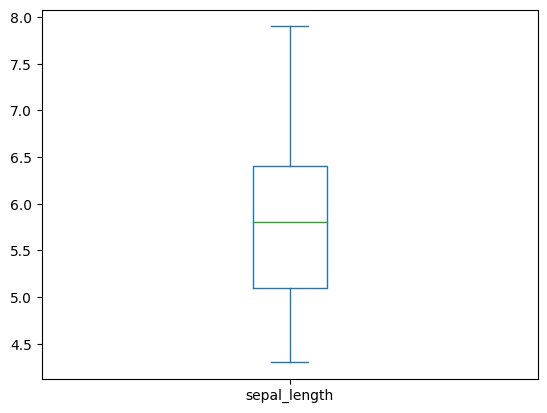

In [10]:
iris["sepal_length"].plot.box()

<Axes: ylabel='Frequency'>

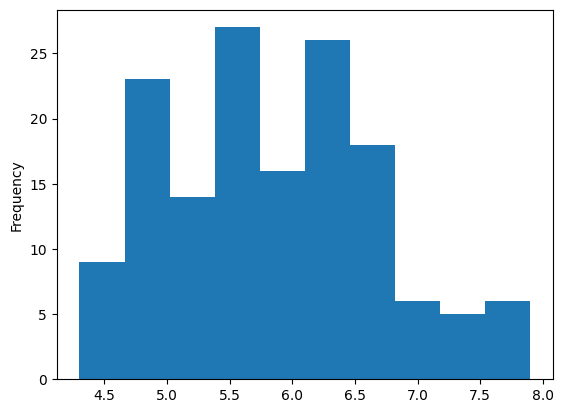

In [11]:
iris["sepal_length"].plot.hist()

<Axes: ylabel='Density'>

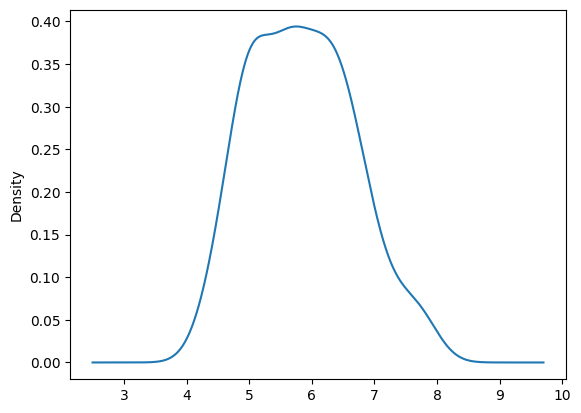

In [12]:
iris["sepal_length"].plot.kde()

<Axes: >

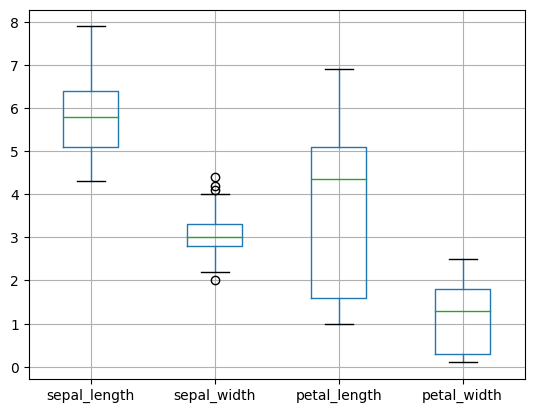

In [13]:
iris.boxplot()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

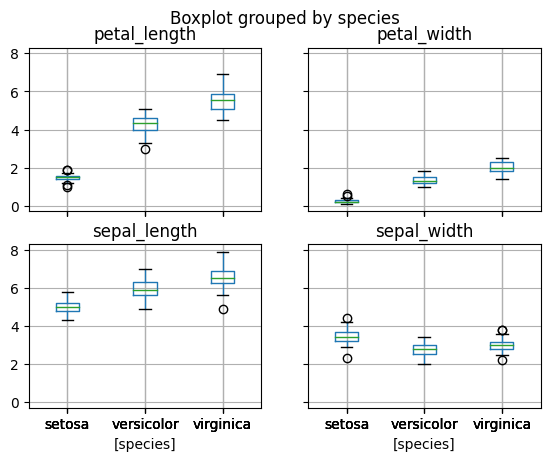

In [24]:
iris.boxplot(by="species")

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

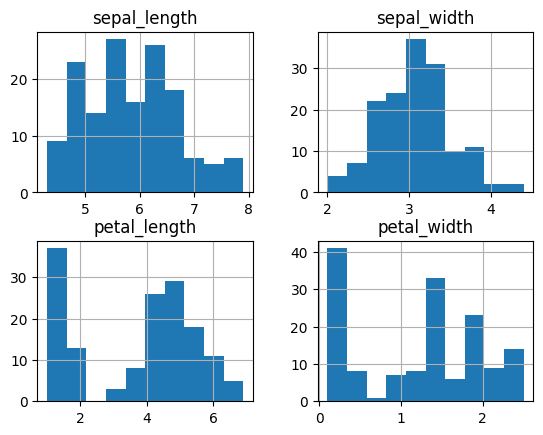

In [22]:
iris.hist()

<Axes: ylabel='Density'>

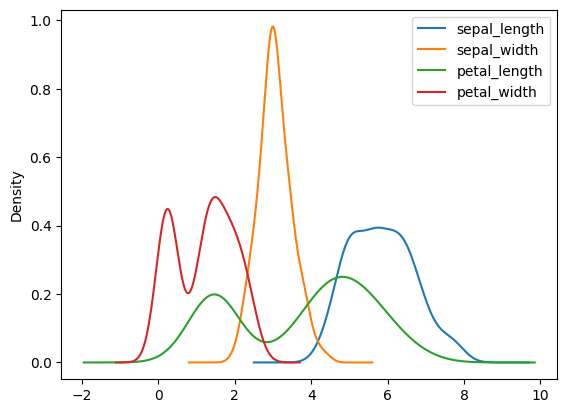

In [23]:
iris.plot.kde()

## Correlation between Numerical Features

In [26]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

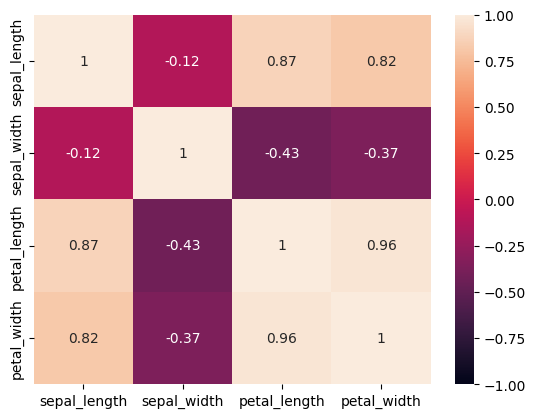

In [29]:
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1)

## Building Model

In [31]:
target = "species"
features = iris.columns.to_list()
features.remove(target)
print(target)
print(features)

species
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [32]:
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
X = df[features].values
print(X[0:5, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [34]:
y = df[target].values
print(y[0:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [35]:
robot = RandomForestClassifier().fit(X=X, y=y)
robot

RandomForestClassifier()

In [36]:
robot.predict(X=X[0:5, :])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [37]:
y[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [38]:
robot.score(X=X, y=y)

1.0

In [39]:
y_pred = robot.predict(X=X)
y_true = y.copy()
df_result = pd.DataFrame(
    data=dict(
        y_pred=y_pred,
        y_true=y_true,
    )
)
df_result.head()

,y_pred,y_true
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa


In [40]:
cm = pd.crosstab(index=df_result["y_true"], columns=df_result["y_pred"])
cm

y_pred,setosa,versicolor,virginica
y_true,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


<Axes: xlabel='y_pred', ylabel='y_true'>

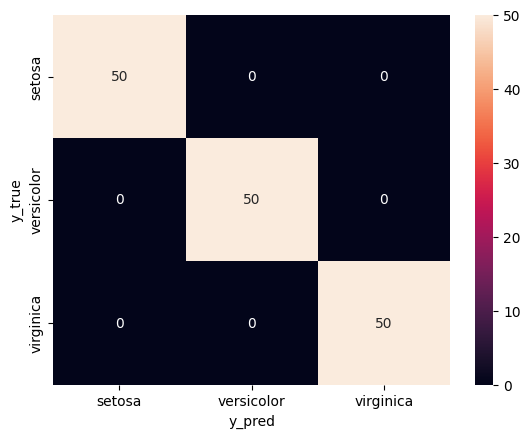

In [42]:
sns.heatmap(data=cm, annot=True)

## Export Dataset

In [44]:
iris.to_csv(path_or_buf="iris.csv", index=False)

## Prepare Requirements before Deployment

In [46]:
%pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote

In [47]:
%pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\Michael\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: autoviz, dtale, pandas-dq
Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip show streamlit

Name: streamlit
Version: 1.27.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: c:\Users\Michael\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, importlib-metadata, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, python-dateutil, requests, rich, tenacity, toml, tornado, typing-extensions, tzlocal, validators, watchdog
Required-by: 
Note: you may need to restart the kernel to use updated packages.
